# MODUL III
# TRANSFORMASI WAVELET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Script "import matplotlib.pyplot as plt" digunakan untuk mengimport library matplotlib.pyplot yang digunakan untuk membuat plot grafik dan visualisasi data

Script "import numpy as np" digunakan untuk mengimport library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra

Script "import cv2 as cv" digunakan untuk mengimport library OpenCV yang digunakan untuk pengolahan citra dan video

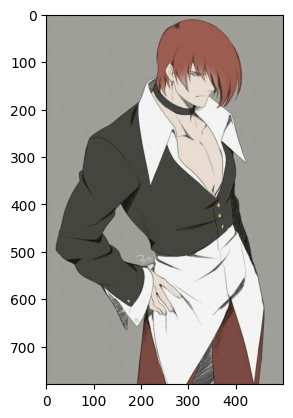

In [2]:
imgCo = plt.imread("IoriYagami.jpg")
plt.imshow(imgCo)

Script tersebut digunakan untuk membaca citra "Res/senheScramble.jpg" menggunakan fungsi imread() dari library matplotlib.image dan menampilkannya menggunakan fungsi imshow() dari matplotlib.pyplot.

imread() digunakan untuk membaca citra dari file dan mengembalikan nilai piksel citra dalam bentuk array numpy. 

### Menampilkan Citra Sebelum dan Setelah Gray Scaling

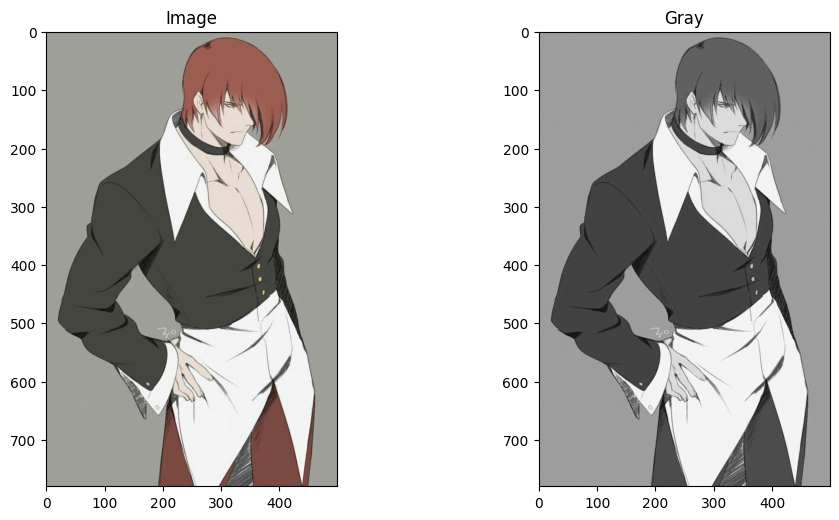

In [22]:
gray = cv.cvtColor(imgCo,cv.COLOR_BGR2GRAY)

plt.figure(figsize = (10, 10))
plt.subplot(221), plt.imshow(imgCo, cmap = 'gray'), plt.title('Image')
plt.subplot(222), plt.imshow(gray, cmap = 'gray'), plt.title('Gray')


plt.tight_layout()
plt.show()

Script di atas merupakan sebuah code yang digunakan untuk meng-import citra Iori Yagami lalu mengubahnya menjadi citra abu dengan fungsi `grayScaling`.

### Membuat Kernel

In [5]:
LPF = np.array([0.6, 0.6])
HPF = np.array([-0.6, 0.6])

Code tersebut berfungsi untuk menginisialisasi kernel x dengan Low-Pass Filter (`LPF`) = [0.6, 0.6] dan High-Pass Filter (`HPF`) = [-0.6, 0.6]

### Membuat Fungsi Konvulusi Baris dan Kolom

In [6]:
def filter_1 (image, kernel):
    n = len(kernel) 
    padd = np.pad (image , [0, n], mode = "constant")
    konvol = np.zeros ((image.shape[0],image.shape[1])) 
    
    #proses konvolusi
    for i in range (len(konvol)):
        for j in range (len(konvol[i])):
            for x in range (len(kernel)):
                konvol[i][j] += (padd[i][j+x]*kernel[x])
    return konvol

def filter_2 (image, kernel):
    n = len(kernel) 
    padd = np.pad (image , [0, n], mode = "constant") 
    konvol = np.zeros ((image.shape[0], image.shape[1])) 
    
    #proses konvolusi
    for i in range (len(konvol)):
        for j in range (len(konvol[i])):
            for x in range (len(kernel)):
                konvol[i][j] += (padd[i+x][j]*kernel[x])
    return konvol

Script di atas adalah dua fungsi yang terkait dengan operasi konvolusi pada citra digital, yaitu konvolusi baris dan konvolusi kolom. Kedua fungsi ini menerima dua parameter, yaitu citra (berupa array NumPy 2D) dan kernel (berupa array NumPy 1D).

Fungsi `filter_1()` melakukan operasi konvolusi pada setiap baris citra dengan menggunakan kernel yang diberikan. Pada awalnya, citra di-padding dengan nilai 0 pada setiap sisi baris dengan menggunakan fungsi `np.pad()`. Kemudian, hasil konvolusi disimpan dalam array result yang sudah diinisialisasi dengan nilai 0 sebelumnya. Fungsi ini mengiterasi setiap elemen pada citra dan kernel, dan melakukan perkalian dan penjumlahan sesuai dengan aturan konvolusi. Akhirnya, hasil konvolusi dikembalikan oleh fungsi ini.

Fungsi `filter_2()` melakukan operasi konvolusi pada setiap kolom citra dengan menggunakan kernel yang diberikan. Prosesnya sama dengan `filter_1()`, tetapi dengan memproses kolom pada citra. Fungsi ini juga mengembalikan hasil konvolusi pada citra.

### Membuat Fungsi DownSampling Baris dan Kolom

In [7]:
def downsampling_2(image): 
    baris=int(image.shape[0]/2)
    kolom=int(image.shape[1])  
    kernel = np.zeros((baris,kolom))
    
    index = 0 
    for i in range(baris):
        for j in range(kolom):
            kernel[i][j] = image[index][j] 
        index += 2 
    return kernel

def downsampling_1(image):
    baris=int(image.shape[0]) 
    kolom=int(image.shape[1]/2) 
    kernel = np.zeros((baris,kolom))
    
    for i in range(baris):
        index = 0 
        for j in range(kolom):
            kernel[i][j] = image[i][index] 
            index += 2 
    return kernel 

Script diatas merupakan implementasi dari fungsi `downsampling_1` dan `downsampling_2` yang berguna untuk melakukan proses down-sampling pada sebuah citra.

Fungsi `downsampling_1` menerima sebuah citra sebagai argumen input dan mengembalikan hasil down-sampling citra tersebut pada dimensi baris dengan faktor 2.

Pada awalnya, fungsi ini membuat sebuah matriks kosong yang berukuran setengah dari dimensi awal citra pada baris, dan sama dengan dimensi citra pada kolom. Kemudian, fungsi melakukan iterasi pada setiap baris dan kolom citra asli, dan memasukkan setiap elemen citra pada baris ke matriks hasil yang baru dibuat dengan faktor 2.

Fungsi `downsampling_2` juga menerima sebuah citra sebagai argumen input dan mengembalikan hasil down-sampling citra tersebut pada dimensi kolom dengan faktor 2.

Fungsi ini melakukan hal yang sama seperti fungsi `downsampling_1` pada dimensi kolom. Namun, matriks hasil yang baru dibuat kali ini berukuran sama dengan dimensi citra pada baris, dan setengah dari dimensi citra pada kolom.

### Membuat Fungsi Normalisasi

In [8]:
def normalisasi(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img)) * 255

Fungsi `normalisasi()` digunakan untuk menghasilkan gambar yang dinormalisasi dengan nilai piksel dalam rentang antara 0 dan 1 dengan mengambil gambar sebagai inputan. Kemudian, menghitungnya dengan mengurangkan nilai minimum piksel dari gambar dan membaginya dengan selisih nilai maksimum dan minimum piksel dalam gambar.

### Melakukan Proses Konvolusi dan DownSampling

In [9]:
konvolusi = filter_1(gray, LPF) 
downsampling = downsampling_1 (konvolusi) 
konvolusi2 = filter_2(downsampling, LPF) 
approximation = downsampling_2 (konvolusi2)
approximation = normalisasi(approximation)

konvolusi = filter_1(gray, LPF) 
downsampling = downsampling_1 (konvolusi) 
konvolusi2 = filter_2(downsampling, HPF) 
detailHorizontal = downsampling_2 (konvolusi2)
detailHorizontal = normalisasi(detailHorizontal)

konvolusi = filter_1(gray, HPF) 
downsampling = downsampling_1 (konvolusi) 
konvolusi2 = filter_2(downsampling, LPF) 
detailVertikal= downsampling_2(konvolusi2) 
detailVertikal = normalisasi(detailVertikal)

konvolusi = filter_1(gray, HPF) 
downsampling = downsampling_1 (konvolusi) 
konvolusi2 = filter_2(downsampling, HPF) 
detailDiagonal = downsampling_2 (konvolusi2)
detailDiagonal = normalisasi(detailDiagonal)

Code tersebut berfungsi untuk menampilkan aproksimasi citra dengan melakukan beberapa fungsi seperti filter_1, `downsampling_1`, `filter_2`, dan `downsampling_2` yang telah dibuat sebelumnya. Pada proses tersebut juga melakukan 2 proses konvolusi yang dimana proses pertama menggunakan low-pass filter dan proses kedua menggunakan low-pass filter. Setelah itu dilakukan normalisasi.

Code tersebut berfungsi untuk menampilkan detail horizontal citra dengan melakukan beberapa fungsi seperti filter_1, `downsampling_1`, `filter_2`, dan `downsampling_2` yang telah dibuat sebelumnya. Pada proses tersebut juga melakukan 2 proses konvolusi yang dimana proses pertama menggunakan low-pass filter dan proses kedua menggunakan high-pass filter. Setelah itu dilakukan normalisasi.

Code tersebut berfungsi untuk menampilkan detail horizontal citra dengan melakukan beberapa fungsi seperti filter_1, `downsampling_1`, `filter_2`, dan `downsampling_2` yang telah dibuat sebelumnya. Pada proses tersebut juga melakukan 2 proses konvolusi yang dimana proses pertama menggunakan high-pass filter dan proses kedua menggunakan low-pass filter. Setelah itu dilakukan normalisasi.

Code tersebut berfungsi untuk menampilkan detail horizontal citra dengan melakukan beberapa fungsi seperti filter_1, `downsampling_1`, `filter_2`, dan `downsampling_2` yang telah dibuat sebelumnya. Pada proses tersebut juga melakukan 2 proses konvolusi yang dimana proses pertama menggunakan high-pass filter dan proses kedua menggunakan high-pass filter. Setelah itu dilakukan normalisasi.

### Membuat Fungsi untuk Menggabungkan Citra

In [10]:
def combine(LL, LH, HL, HH):
    imgCo = np.zeros((LL.shape[0]*2, LL.shape[1]*2)).astype(np.uint8)
    imgCo[:LL.shape[0], :LL.shape[1]] = LL
    imgCo[:LH.shape[0], LH.shape[1]:] = LH
    imgCo[HL.shape[0]:, :HL.shape[1]] = HL
    imgCo[HH.shape[0]:, HH.shape[1]:] = HH

    return imgCo

Fungsi di atas bertujuan untuk menyusun beberapa gambar menjadi satu gambar besar dalam bentuk matriks yang disimpan dalam variabel img.

Pertama, sebuah matriks kosong img dibuat dengan ukuran dua kali lebih besar dari parameter LL dalam dimensi baris dan dua kali lebih besar dari parameter LL dalam dimensi kolom. Kemudian, setiap gambar (LL, LH, HL, dan HH) ditempatkan dalam img sesuai dengan posisi relatifnya.

Potongan LL ditempatkan di bagian kiri atas img.
Potongan LH ditempatkan di sebelah kanan atas img.
Potongan HL ditempatkan di sebelah kiri bawah img.
Potongan HH ditempatkan di bagian kanan bawah img.

### Membuat Fungsi untuk Menampilkan Hasil Dekomposisi

In [11]:
def show(LL, LH, HL, HH):
    plt.figure(figsize = (16, 5))

    plt.subplot(151)
    plt.title('Approximation')
    plt.imshow(LL, cmap = 'gray')
    plt.axis("off")

    plt.subplot(152)
    plt.imshow(LH, cmap = 'gray')
    plt.title('Horizontal Details')
    plt.axis("off")

    plt.subplot(153)
    plt.imshow(HL, cmap = 'gray')
    plt.title('Vertical Details')
    plt.axis("off")

    plt.subplot(154)
    plt.imshow(HH, cmap = 'gray')
    plt.title('Diagonal Details')
    plt.axis("off")

    plt.subplot(155)
    plt.imshow(combine(LL, LH, HL, HH), cmap = 'gray')
    plt.title('Result')
    plt.axis("off")

Fungsi `show` menerima empat input yang merupakan matriks yang mewakili gambar dalam format koefisien wavelet hasil dari transformasi wavelet dua dimensi. Kemudian, menggunakan `matplotlib`, fungsi tersebut memvisualisasikan komponen-komponen tersebut dalam lima subplot: Aproximasi (LL), Detail Horizontal (LH), Detail Vertikal (HL), dan Detail Diagonal (HH). Setiap subplot memiliki judul yang sesuai dan menggunakan skala abu-abu untuk representasi gambar. Pada subplot terakhir, hasil dari penggabungan kembali ke bentuk aslinya dengan menggunakan fungsi `combine` juga ditampilkan. Subplot-subplot ini ditampilkan dalam satu baris secara horizontal dengan ukuran total gambar sebesar 16x5.

### Menampilkan Hasil Dekomposisi

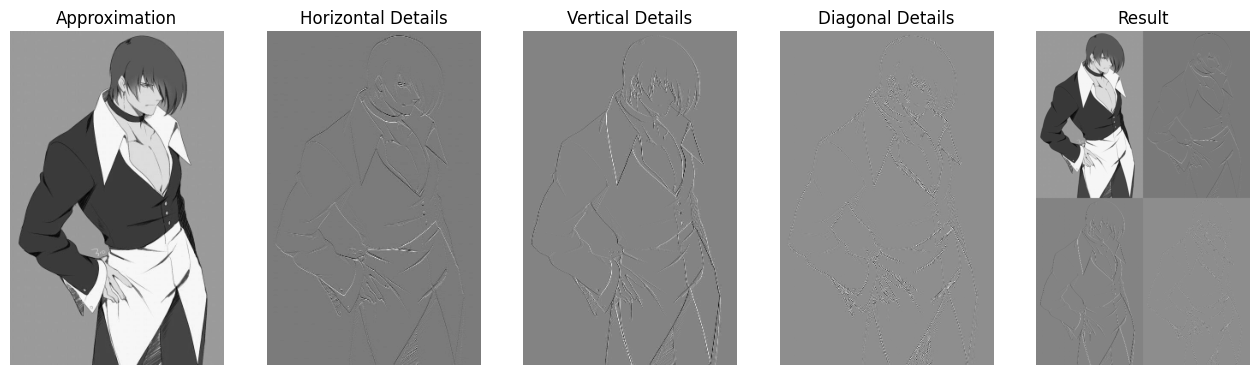

In [12]:
show (approximation, detailHorizontal, detailVertikal, detailDiagonal)

Memanggil fungsi `show()`

### Membuat Fungsi untuk UpSampling Baris dan Kolom

In [13]:
def upsampling_1(image): #baris
    rows, cols = image.shape
    upsampled = np.zeros((rows*2, cols))
    for i in range(rows):
        for j in range(cols):
            upsampled[i*2][j] = image[i][j]
    return upsampled

def upsampling_2(image): #kolom
    rows, cols = image.shape
    upsampled = np.zeros((rows, cols*2))
    for i in range(rows):
        for j in range(cols):
            upsampled[i][j*2] = image[i][j]
    return upsampled

Fungsi `upsampling_1` melakukan upsampling (pembesaran) pada gambar input dalam arah baris, menggandakan jumlah barisnya (menjadi dua kali lipat), sementara jumlah kolomnya tetap. Ini dilakukan dengan membuat matriks baru yang dua kali lipat lebih tinggi dari matriks input, lalu menyalin nilai-nilai piksel dari baris input ke baris ganjil pada matriks hasil. Fungsi `upsampling_2`, di sisi lain, melakukan upsampling dalam arah kolom, menggandakan jumlah kolomnya (menjadi dua kali lipat), sementara jumlah barisnya tetap. Prosesnya serupa dengan `upsampling_1`, tetapi kali ini nilai-nilai piksel disalin dari kolom input ke kolom ganjil pada matriks hasil. Kedua fungsi ini mengembalikan gambar yang telah di-upsampling.

### Membuat Fungsi Rekonstruksi

In [14]:
def rekonstruksi(LL, LH, HL, HH):
    upSam1LH = upsampling_1(LL)
    konvolusiKolomLow = filter_2(upSam1LH, LPF)

    upSam1LH = upsampling_1(LH)
    konvolusiKolomHigh = filter_2(upSam1LH, HPF)

    upSamLH = upsampling_2(konvolusiKolomHigh + konvolusiKolomLow )
    konvolusi1Low = filter_1(upSamLH, LPF)
    
    upSam1HL = upsampling_1(HL)
    konvolusiKolomLow = filter_2(upSam1HL, LPF)

    upSam1HH = upsampling_1(HH)
    konvolusiKolomHigh = filter_2(upSam1HH, HPF)


    upSamLH = upsampling_2(konvolusiKolomHigh + konvolusiKolomLow )
    konvolusi1High = filter_1(upSamLH, HPF)

    hasil = konvolusi1High + konvolusi1Low
    return hasil

Pada proses rekontruksi kita perlu untuk membalikan gambar hasil dekomposisi kembali ke keadaan awal dari citra asli yang di downsampling kita perlu mereverse dengan upsampling  dari masing masing citra hasil dekomposisi, kemudia berdasarkan masing masing citra kita perlu melakukan konvolusi balik berdasarkan keadaan gambar pada tahap dekomposisi 2 nya, kemudian supaya gambar kembali menjadi dekomposisi tahap 2 maka kita perlu menjumlahkan gambar,setelah mendapatkan dekomposisi tahap 1 (rekontruksi tahap 2) masih diperlukan 1 proses yang sama lagi yaitu upsampling 

### Menampilkan Hasil Rekonstruksi

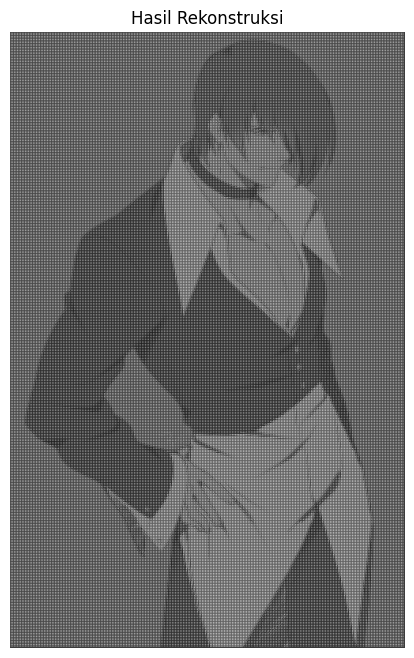

In [15]:
result = rekonstruksi(approximation, detailHorizontal, detailVertikal, detailDiagonal)

plt.figure(figsize=(8, 8))
plt.imshow(result, cmap='gray')
plt.title('Hasil Rekonstruksi')
plt.axis('off')
plt.show()

Code diatas menggunakan hasil dari fungsi rekonstruksi untuk mendapatkan gambar rekonstruksi dari komponen-komponen wavelet yang diberikan `approximation (LL)`, `detailHorizontal (LH)`, `detailVertikal (HL)`, dan `detailDiagonal (HH)`. Gambar rekonstruksi kemudian ditampilkan menggunakan matplotlib dengan judul "Hasil Rekonstruksi" dalam skala abu-abu dan ukuran figur 8x8 piksel, lalu ditampilkan tanpa sumbu koordinat.

### Membuat Fungsi Dekomposisi Dinamis

In [16]:
def dekom(level, kernelLow, kernelHigh, img):
    listHasilDkmpLvl = []
    for i in range(level):
        if i == 0:
            konvolusi = filter_1(img, kernelLow) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelLow) 
            approximation = downsampling_2 (konvolusi2)
            approximation = normalisasi(approximation)

            konvolusi = filter_1(img, kernelLow) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelHigh) 
            detailHorizontal = downsampling_2 (konvolusi2)
            detailHorizontal = normalisasi(detailHorizontal)

            konvolusi = filter_1(img, kernelHigh) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelLow) 
            detailVertikal= downsampling_2(konvolusi2) 
            detailVertikal = normalisasi(detailVertikal)

            konvolusi = filter_1(img, kernelHigh) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelHigh) 
            detailDiagonal = downsampling_2 (konvolusi2)
            detailDiagonal = normalisasi(detailDiagonal)

            listHasilDkmpLvl.append([approximation,detailHorizontal, detailVertikal, detailDiagonal])
        else:
            konvolusi = filter_1(listHasilDkmpLvl[i-1][0], kernelLow) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelLow) 
            approximation = downsampling_2 (konvolusi2)
            approximation = normalisasi(approximation)

            konvolusi = filter_1(listHasilDkmpLvl[i-1][0], kernelLow) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelHigh) 
            detailHorizontal = downsampling_2 (konvolusi2)
            detailHorizontal = normalisasi(detailHorizontal)

            konvolusi = filter_1(listHasilDkmpLvl[i-1][0], kernelHigh) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelLow) 
            detailVertikal= downsampling_2(konvolusi2) 
            detailVertikal = normalisasi(detailVertikal)

            konvolusi = filter_1(listHasilDkmpLvl[i-1][0], kernelHigh) 
            downsampling = downsampling_1 (konvolusi) 
            konvolusi2 = filter_2(downsampling, kernelHigh) 
            detailDiagonal = downsampling_2 (konvolusi2)
            detailDiagonal = normalisasi(detailDiagonal)

            listHasilDkmpLvl.append([approximation,detailHorizontal, detailVertikal, detailDiagonal])
    
    # for i in range(level):
        # print(listHasilDkmpLvl[i][0].shape)

    hasilMerge = combine(listHasilDkmpLvl[-1][0], listHasilDkmpLvl[-1][1], listHasilDkmpLvl[-1][2], listHasilDkmpLvl[-1][3])
    for element in listHasilDkmpLvl[-2::-1]:
        temp = hasilMerge
        tinggi, lebar = temp.shape
        HL = element[1]
        LH = element[2]
        HH = element[3]
        hasilMerge = combine(temp, HL[:tinggi,:lebar], LH[:tinggi,:lebar], HH[:tinggi,:lebar])
         
    return hasilMerge, listHasilDkmpLvl

Fungsi `dekom` berfungsi untuk melakukan proses dekomposisi dengan menggunakan transformasi wavelet. Proses dimulai dengan iterasi sebanyak `level`, yang menentukan kedalaman dekomposisi. Pada setiap iterasi, gambar input `img` diolah dengan filter rendah (`kernelLow`) dan tinggi (`kernelHigh`) untuk menghasilkan empat komponen: LL (approximation), LH (horizontal detail), HL (vertical detail), dan HH (diagonal detail). Komponen-komponen ini disimpan dalam list `listHasilDkmpLvl` untuk penggunaan di tahap rekonstruksi. Bagian `if-else` digunakan untuk membedakan antara iterasi pertama dan iterasi selanjutnya. Iterasi pertama membutuhkan proses dekomposisi yang berbeda karena tidak ada gambar LL dari iterasi sebelumnya yang dapat digunakan sebagai input. Oleh karena itu, pada iterasi pertama, gambar input `img` langsung diolah dengan filter rendah dan tinggi untuk menghasilkan komponen-komponen wavelet. Setelah itu, komponen-komponen ini dimasukkan ke dalam list `listHasilDkmpLvl`. Pada iterasi selanjutnya (iterasi ke-1 hingga ke-`level`), gambar LL dari iterasi sebelumnya diambil sebagai input untuk proses dekomposisi pada iterasi saat ini. Ini dilakukan karena dalam transformasi wavelet, LL dari iterasi sebelumnya berperan sebagai gambar dengan resolusi yang lebih rendah. Jadi, proses dekomposisi selanjutnya dilakukan pada gambar dengan resolusi yang lebih rendah tersebut untuk mempertahankan informasi resolusi rendah. Setelah selesai proses dekomposisi, komponen-komponen hasilnya juga dimasukkan ke dalam `listHasilDkmpLvl` untuk digunakan dalam tahap rekonstruksi.

### Menampilkan Final Result

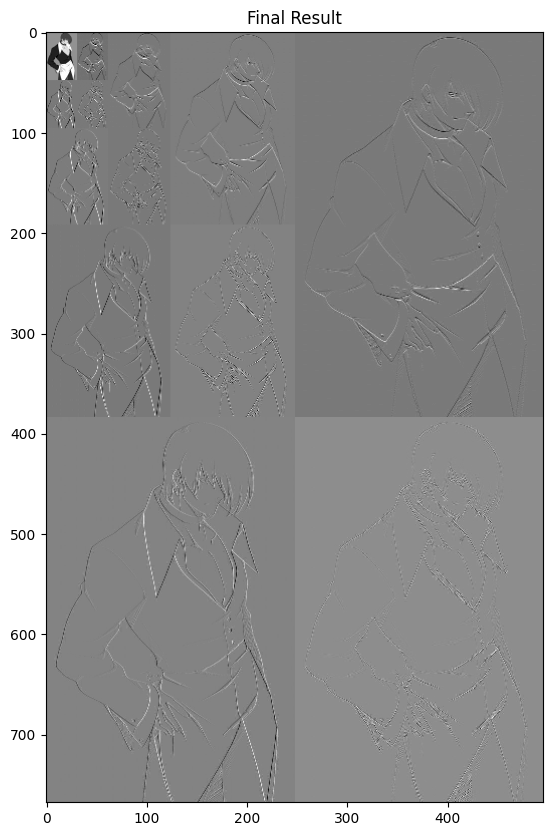

In [17]:
hasilDkmpDinamis, _ = dekom(4, LPF, HPF, gray)
plt.figure(figsize=(10,10))
plt.title('Final Result')
plt.imshow(hasilDkmpDinamis, cmap="gray")

Kode diatas menggunakan fungsi dekom untuk melakukan proses dekomposisi dengan transformasi wavelet pada gambar gray dengan menggunakan filter rendah (LPF) dan filter tinggi (HPF). Proses ini dilakukan sebanyak 4 level. Hasil rekonstruksi dari proses dekomposisi tersebut disimpan dalam variabel hasilDkmpDinamis. Kemudian, gambar rekonstruksi tersebut ditampilkan menggunakan matplotlib dengan judul "Final Result" dalam skala abu-abu. Ukuran figur ditetapkan sebagai 10x10 inci.

### Membuat Fungsi untuk Menampilkan Hasil Dekomposisi Pada No 3

In [18]:
def show1(LL, LH, HL, HH):
    plt.figure(figsize = (16, 5))

    plt.subplot(151)
    plt.title('Approximation')
    plt.imshow(LL, cmap = 'gray')
    plt.axis("off")

    plt.subplot(152)
    plt.imshow(LH, cmap = 'gray')
    plt.title('Horizontal Details')
    plt.axis("off")

    plt.subplot(153)
    plt.imshow(HL, cmap = 'gray')
    plt.title('Vertical Details')
    plt.axis("off")

    plt.subplot(154)
    plt.imshow(HH, cmap = 'gray')
    plt.title('Diagonal Details')
    plt.axis("off")

Kode diatas sama seperti fungsi `show` sebelumnya, hanya saja dibedakan tidak ada untuk menggabungkan gambar.

### Menampilkan Hasil Dekomposisi No 3

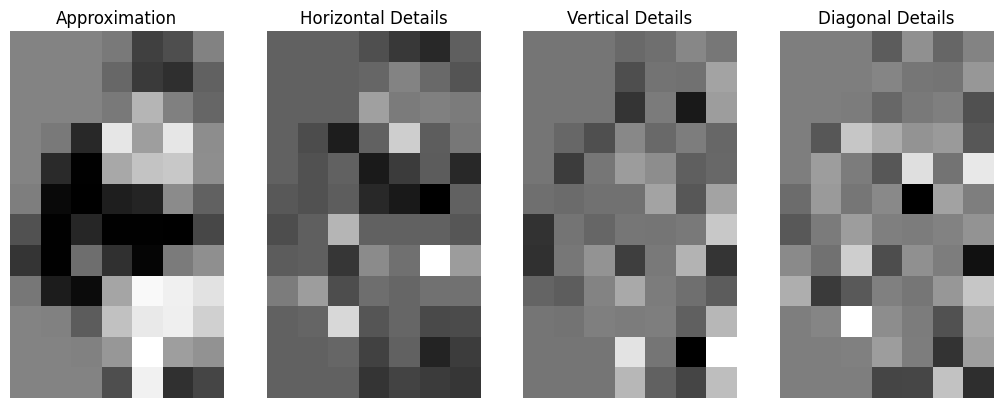

In [19]:
_, dkmp6 = dekom(6, LPF, HPF, gray)

show1(dkmp6[5][0],dkmp6[5][1],dkmp6[5][2],dkmp6[5][3])

Dekomposisi pada soal no.3 merupakan hasil dekomposisi yang dilakukan pada level 6. hasil dekomposisinya menghasilkan ukuran dengan dimensi 13 x 8 (tinggi = 13 dan lebar = 8).  
karena pada soal yang ditampilkan hasil dengan dimensi 12 x 7, maka hasil dekomposisi tersebut akan dipotong 1 pixel dari sisi kanan dan bawah sehingga akan menghasilkan ukuran 12 x 7.

### Membuat Fungsi untuk Representasi Sinyal

In [20]:
def signal(title, img, color):
    height, width = img.shape
    result = []
    
    for i in range(height):
        for j in range(width):
            result.append(img[i, j])
    
    plt.figure(figsize=(12, 5))
    plt.plot([j for j in range(0, len(result))], result, color, linestyle='-')
    plt.xlabel('Indeks')
    plt.ylabel('Amplitudo')
    plt.title(title)

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.show()

Fungsi `signal` mengambil tiga parameter: `title` (judul plot), `img` (gambar dalam bentuk matriks), dan `color` (warna garis plot). Fungsi ini bertujuan untuk merangkum gambar dalam bentuk sinyal. Pertama-tama, fungsi ini mendapatkan dimensi gambar dan membuat sebuah list kosong `result`. Kemudian, menggunakan dua loop bersarang, nilai piksel dari setiap titik gambar diambil dan dimasukkan ke dalam list `result`. Setelah mendapatkan semua nilai piksel, fungsi menggunakan `matplotlib` untuk membuat plot garis. Plot ini memiliki sumbu x sebagai indeks (mulai dari 0 hingga jumlah total nilai piksel) dan sumbu y sebagai amplitudo (nilai piksel). Judul plot ditentukan oleh parameter `title`. Setelah plot dibuat, sumbu x dan y dinonaktifkan menggunakan `plt.gca().set_xticklabels([])` dan `plt.gca().set_yticklabels([])`. Hasil plot kemudian ditampilkan menggunakan `plt.show()`.

### Menampilkan Hasil Representasi Sinyal

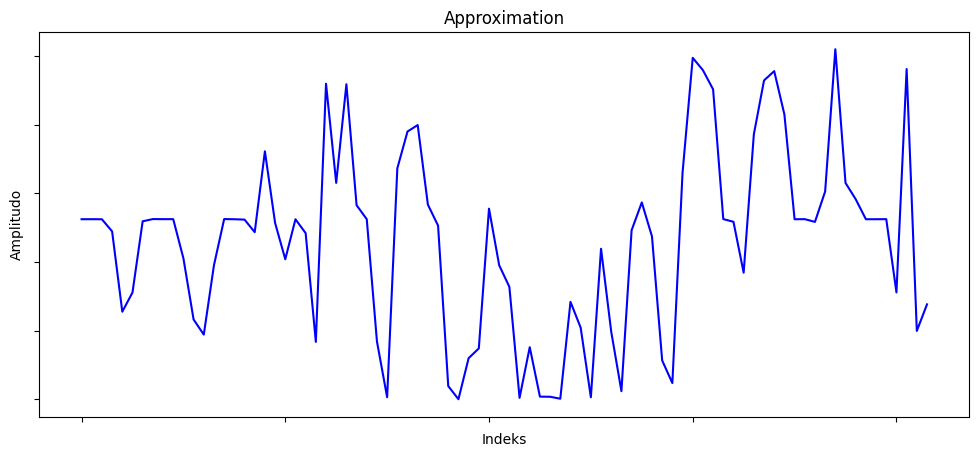

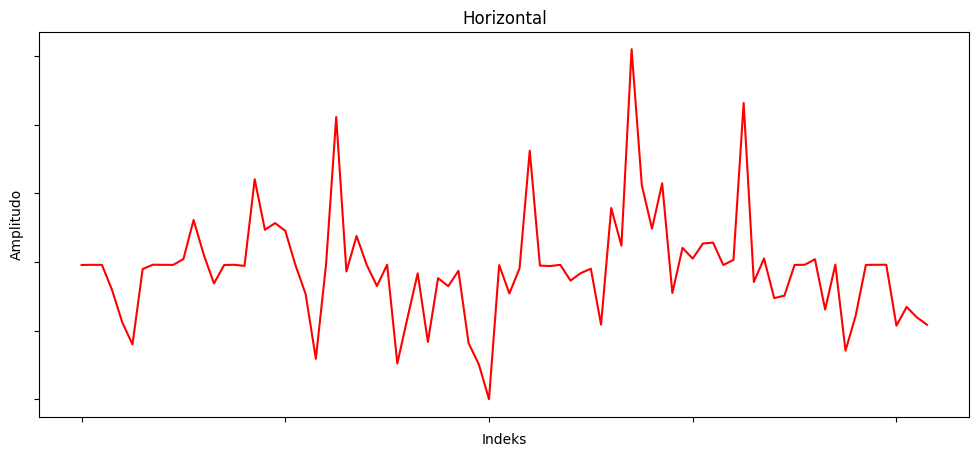

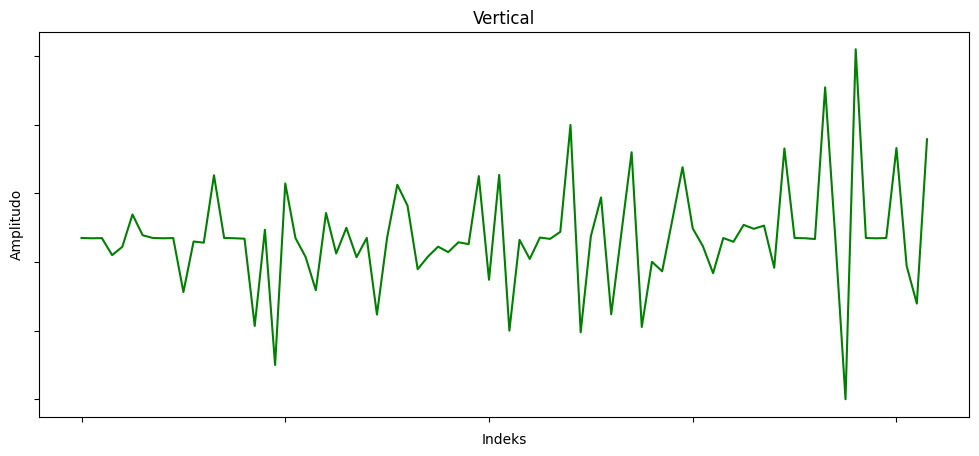

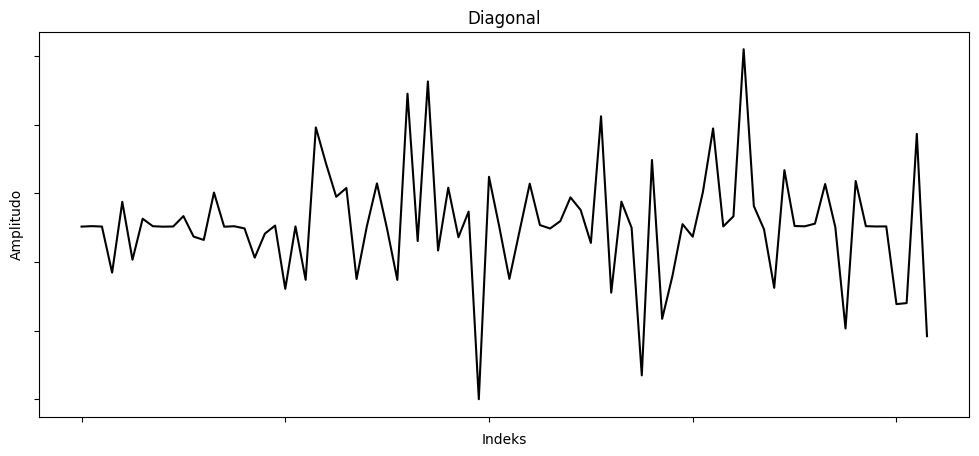

In [21]:
signal('Approximation', dkmp6[5][0], 'blue')
signal('Horizontal', dkmp6[5][1], 'red')
signal('Vertical', dkmp6[5][2], 'green')
signal('Diagonal', dkmp6[5][3], 'black')

Kode diatas menggunakan fungsi `signal` untuk memplot sinyal dari komponen-komponen hasil dekomposisi wavelet pada level ke-6 (`dkmp6[5][0]` untuk LL, `dkmp6[5][1]` untuk LH, `dkmp6[5][2]` untuk HL, dan `dkmp6[5][3]` untuk HH). Setiap komponen dipetakan dengan warna yang berbeda, di mana LL ditampilkan dalam warna biru, LH dalam warna merah, HL dalam warna hijau, dan HH dalam warna hitam. Ini membantu visualisasi sinyal dari masing-masing komponen untuk memahami karakteristik mereka secara terpisah.